# Первичный анализ данных и визуализации

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

## Первичный анализ данных, pandas и графики

**pandas** - библиотека для работы с данными в табличном формате   

+ будем работать с датасетом [Student Performance](http://archive.ics.uci.edu/ml/datasets/Student+Performance#)
+ постараемся предсказать итоговую оценку по математике (G3) по разным другим признакам 



### Attributes


1. **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. **sex** - student's sex (binary: 'F' - female or 'M' - male)
3. **age** - student's age (numeric: from 15 to 22)
4. **address** - student's home address type (binary: 'U' - urban or 'R' - rural)
5. **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
8. **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
9. **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. **guardian** - student's guardian (nominal: 'mother', 'father' or 'other')
13. **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
16. **schoolsup** - extra educational support (binary: yes or no)
17. **famsup** - family educational support (binary: yes or no)
18. **paid**- extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. **activities** - extra-curricular activities (binary: yes or no)
20. **nursery** - attended nursery school (binary: yes or no)
21. **higher** - wants to take higher education (binary: yes or no)
22. **internet** - Internet access at home (binary: yes or no)
23. **romantic** - with a romantic relationship (binary: yes or no)
24. **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
26. **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **health** - current health status (numeric: from 1 - very bad to 5 - very good)
30. **absences** - number of school absences (numeric: from 0 to 93)



### Target:
31. **G1** - first period grade (numeric: from 0 to 20)
31. **G2** - second period grade (numeric: from 0 to 20)
32. **G3** - final grade (numeric: from 0 to 20, output target)

### Посмотрим на данные

In [2]:
import pandas as pd

In [3]:
# загружаем датасет с оценками по математике
# не забываем указать правильный разделитель
data = pd.read_csv('https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv', delimiter=';')

In [4]:
# посмотрим на первые 15 строк таблицы
# каждая строка - объект
# столбцы - признаки
data.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


### Удаление столбцов, добавление столбцов, сортировка

In [5]:
# убираем столбцы G1 и G2, т.к. нас интересует только G3
data = data.drop(columns=['G1', 'G2'])

In [6]:
# добавить столбец
data['MeanAlc'] = (data['Walc']+data['Dalc'])/2

In [7]:
data = data.drop(columns=['MeanAlc'])

In [8]:
# отсортируем по оценкам по убыванию
sorted_data = data.sort_values(by='G3', ascending=False)

In [9]:
# первые 5 учеников
sorted_data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
47,GP,M,16,U,GT3,T,4,3,health,services,...,yes,no,4,2,2,1,1,2,4,20
113,GP,M,15,U,LE3,T,4,2,teacher,other,...,yes,no,3,5,2,1,1,3,10,19
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,...,yes,no,5,5,3,1,1,4,6,19
286,GP,F,18,U,GT3,T,2,2,at_home,at_home,...,yes,no,4,3,3,1,2,2,5,19
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,19


In [10]:
# последние 5 учеников
sorted_data.tail(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
160,GP,M,17,R,LE3,T,2,1,at_home,other,...,yes,yes,3,3,2,2,2,5,0,0
162,GP,M,16,U,LE3,T,1,2,other,other,...,no,no,4,4,4,2,4,5,0,0
168,GP,F,16,U,GT3,T,2,2,other,other,...,yes,no,5,1,5,1,1,4,0,0
367,MS,F,17,R,GT3,T,1,1,other,services,...,yes,yes,5,2,1,1,2,1,0,0
150,GP,M,18,U,LE3,T,1,1,other,other,...,yes,yes,2,3,5,2,5,4,0,0


### Индексация

In [11]:
# индексация - строки
data.loc[0]
# data.loc[:10]

school             GP
sex                 F
age                18
address             U
famsize           GT3
Pstatus             A
Medu                4
Fedu                4
Mjob          at_home
Fjob          teacher
reason         course
guardian       mother
traveltime          2
studytime           2
failures            0
schoolsup         yes
famsup             no
paid               no
activities         no
nursery           yes
higher            yes
internet           no
romantic           no
famrel              4
freetime            3
goout               4
Dalc                1
Walc                1
health              3
absences            6
G3                  6
Name: 0, dtype: object

In [12]:
# индексация - столбцы
data['G3']
# data[['school', 'address']] # несколько столбцов

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [18]:
type(data[['school', 'address']])

pandas.core.frame.DataFrame

In [13]:
# и то, и другое
data['G3'].loc[0]
# data.loc[0]['G3'] # так тоже можно

6

In [14]:
# индексация по условию
# средняя оценка людей, состоящих в отношениях
data[data['romantic'] == 'yes']['G3'].mean()

9.575757575757576

In [15]:
# и не состоящих
data[data['romantic'] == 'no']['G3'].mean()

10.836501901140684

In [16]:
# несколько условий
# есть отношения и хорошие отношения в семье
data[(data['romantic'] == 'yes') & (data['famrel'] >= 4)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
14,GP,M,15,U,GT3,A,2,2,other,other,...,yes,yes,4,5,2,1,1,3,0,16
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,yes,yes,4,4,5,5,5,5,16,11
32,GP,M,15,R,GT3,T,4,3,teacher,at_home,...,yes,yes,4,5,2,1,1,5,0,16
41,GP,M,15,U,LE3,T,4,4,teacher,other,...,yes,yes,5,4,3,2,4,5,8,12
45,GP,F,15,U,LE3,A,4,3,other,other,...,yes,yes,5,2,2,1,1,5,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,MS,M,18,R,LE3,T,1,2,at_home,services,...,yes,yes,4,3,3,2,3,3,3,12
376,MS,F,20,U,GT3,T,4,2,health,other,...,yes,yes,5,4,3,1,1,3,4,15
378,MS,F,18,U,GT3,T,3,3,other,other,...,yes,yes,4,1,3,1,2,1,0,15
381,MS,M,18,R,GT3,T,2,1,other,other,...,yes,yes,4,4,3,1,3,5,5,7


In [17]:
# есть отношения или хорошие отношения в семье
data[(data['romantic'] == 'yes') | (data['famrel'] >= 4)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,0,0
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,0,8
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,9
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,7


### Задание
Найти средний возраст тех, кто много пьет (Dalc и Walc >= 4) и тех, кто мало пьёт (Dalc и Walc = 1)


In [25]:
data[(data['Dalc'] >= 4) & (data['Walc'] >= 4)]['age'].mean()

17.1875

In [26]:
data[(data['Dalc'] == 1) & (data['Walc'] == 1)]['age'].mean()

16.453333333333333

## Типы признаков и их статистические характеристики

In [ ]:
# названия столбцов
data.columns

In [ ]:
# количестов объектов, названия и типы признаков
data.info()

In [ ]:
# узнать разные статистические характеристики числовых признаков 
data.describe()

#### Визуализация распределения значений для численных переменных

In [ ]:
# гистограмма
data['G3'].plot(kind='hist', figsize=(5, 5))

In [ ]:
# то же самое для бинарных и категориальных признаков
# в include пишем нужные типы переменных
data.describe(include=['object'])

Для категориальных (тип object) и булевых (тип bool) признаков можно воспользоваться методом value_counts.

In [ ]:
# узнаем какие профессии родителей встречаются чаще всего
data['Mjob'].value_counts()

In [ ]:
# то же самое, но в % соотношении
data['Mjob'].value_counts(normalize=True)

In [ ]:
data['Fjob'].value_counts()

#### Визуализация распределения значений для категориальных переменных

<AxesSubplot:>

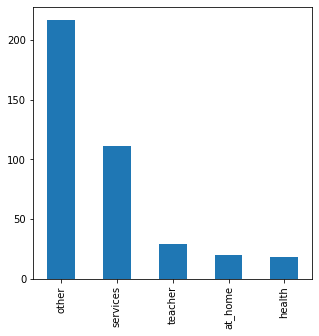

In [27]:
# bar plot
data['Fjob'].value_counts().plot(kind='bar', figsize=(5,5))

### Сводные таблицы

In [28]:
# pd.crosstab(data['sex'], data['romantic'])
pd.crosstab(data['sex'], data['romantic'], normalize=True)

romantic,no,yes
sex,,
F,0.326582,0.200000
M,0.339241,0.134177


In [29]:
# сколько мальчиков и девочек среду тех, кто получил худшие оценки
worst_grades = data[data['G3'] <= 7]
pd.crosstab(worst_grades['G3'], worst_grades['sex'], normalize=True)

sex,F,M
G3,,
0,0.328571,0.214286
4,0.014286,0.000000
5,0.042857,0.057143
6,0.185714,0.028571
7,0.057143,0.071429


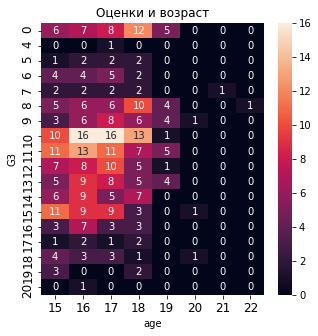

In [32]:
# то же самое в виде очень красивого и очень разноцветного графика

table = pd.crosstab(data['G3'], data['age'])

plt.figure(figsize=(5, 5)) # регулируем размер графика

sns.heatmap(table, # таблица
            xticklabels=table.columns, # названия столбцов
            yticklabels=table.index, # названия колонок
           annot=True) # подписать значения на цветных квадратиках
           
# добавляем название
plt.title('Оценки и возраст', fontsize=12)

# делаем шрифт побольше
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### **Вопросы**
+ Какой % учеников ни разу не пропускал занятия?
+ Какой % учеников проваливал экзамены хотя бы один раз?
+ Есть ли сильно пьющие ученики (Dalc или Walc 4 и больше) с очень высокими оценками (G3 >= 18)? Какая самая высокая оценка среди сильно пьющих учеников?
+ Есть ли состоящие в отношениях ученики с высокими оценками (G3 >= 18)? Какая самая высокая оценка среди учеников, состоящих в отношених?
+ Правда ли, что большинство людей с высшим баллом (G3 >= 18) пьют мало/не пьют (Dalc и Walc = 1)?

In [35]:
data['absences'].value_counts(normalize=True)[0]

0.2911392405063291

In [38]:
1 - data['failures'].value_counts(normalize=True)[0]

0.21012658227848102

In [39]:
data[(data['Dalc'] >= 4) & (data['Walc'] >= 4) & (data['G3'] >= 18)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3


In [40]:
data[(data['Dalc'] >= 4) & (data['Walc'] >= 4)]['G3'].max()

13

In [41]:
data[(data['romantic'] == 'yes') & (data['G3'] >= 18)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
260,GP,F,18,U,GT3,T,4,3,services,other,...,yes,yes,3,1,2,1,3,2,21,18


In [43]:
data[(data['romantic'] == 'yes')]['G3'].max()

18

In [45]:
pd.crosstab(data[data['G3'] >= 18]['Dalc'], data[data['G3'] >= 18]['Walc'], normalize=True)

Walc,1,2,3,5
Dalc,,,,
1,0.666667,0.111111,0.111111,0.000000
2,0.000000,0.000000,0.055556,0.055556


In [74]:
data[data['G3'] >= 18].groupby(['Dalc', 'Walc']).size()

Dalc  Walc
1     1       12
      2        2
      3        2
2     3        1
      5        1
dtype: int64

## Корреляции

In [72]:
# корреляция между признаками (только количественные)
data.corr()
# data.corr().abs() # абсолютные значения

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.054660


**Задание** - нарисовать таблицу корреляции в виде очень красивого и очень разноцветного графика с подписями

<AxesSubplot:>

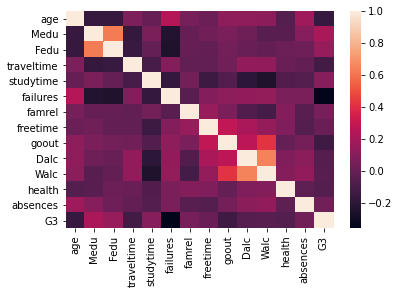

In [81]:
# то же самое в виде очень красивого и очень разноцветного графика
sns.heatmap(data.corr())

+ https://matplotlib.org/stable/tutorials/colors/colormaps.html
+ https://matplotlib.org/stable/gallery/color/colormap_reference.html

In [ ]:
# признаки, больше всего коррелирующие с целевой переменной (G3)
data.corr().abs()['G3'].sort_values(ascending=False)

### Вопросы
+ Те, кто много пьёт, учатся хуже?
+ Учащиеся, которые живут дальше от школы чаще отстутствуют? 
+ Те у кого здоровье хуже чаще отстутвуют?

### Задание - на дом
Написать функцию, которая выведет топ n пар признаков с самым высоким абсолютным коэффициентом корреляции

In [ ]:
data.corr().unstack()

In [ ]:
def get_top_n_abs_corr(data, n=5):
    pass

## Визуализации по итогам обучения модели

In [ ]:
target = data['G3']
data = data.drop(columns=['G3'])

Преобразуем не числовые признаки в компьютерочитаемый вид:

**Бинарные кодируем в 0 и 1:**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
for column in data.columns:
    if data[column].dtype == 'object' and len(data[column].unique()) == 2:
        print(column)
        data[column] = le.fit_transform(data[column])

**Категориальные** - one-hot encoding

Почему просто не заменить на числа с помощью Label Encoder?
+ В принципе так можно делать.
+ Но это не очень правильно, т.к. весь смысл категориальности теряется и появляются ложные интерпретации.
+ Ведь значения категориальных признаков нельзя сравнить между собой или расположить по порядку,в отличие от чисел.  Почему просто не заменить на числа с помощью Label Encoder?
+ В принципе так можно делать.
+ Но это не очень правильно, т.к. весь смысл категориальности теряется и появляются ложные интерпретации.
+ Ведь значения категориальных признаков нельзя сравнить между собой или расположить по порядку,в отличие от чисел.  

На примере признака Mjob, если заменить на значения числа (health -> 0, teacher -> 1, at_home -> 2, services -> 3, other -> 4), то получается что 
+ health < teacher < at_home < services < other 
+ teacher + at_home = services 
+ и т.д.
+ и все это не свойство данных, а свойство выбранной нами кодировки!

С категориальными признаками правильнее использовать One-hot encoding - создать N новых бинарных признаков (N - количество уникальных значений), 1 - в том столбце, где значение признака равно названию столбца, в остальных - 0. 
![](https://i.imgur.com/mtimFxh.png)

In [ ]:
# те у которых больше 2 значений - делаем one-hot encoding
# drop_first - удаляем одну из колонок, тк она восстанавливается по значениям других (то, что не Red и не Yellow - точно Green)
data = pd.get_dummies(data, drop_first=True)

In [ ]:
data.head()

Делим на обучающую и тестовую выборки:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# фиксируем RANDOM_STATE для воспороизводимости результатов (при каждм перезапуске ячейки в тестовую выборку попадают одни и те же объекты,
# соотв-но значение метрики качества для одной и той же модели не будет меняться каждый раз)
RANDOM_STATE = 666
# train_test_split рандомно выбирает 25% объектов и соответсвующих им ответов
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=RANDOM_STATE)

In [ ]:
# 39 признаков, 296 объектов в обучающй выборке
X_train.shape, y_train.shape

In [ ]:
# 39 признаков, 99 объектов в тестовой выборке
X_test.shape, y_test.shape

### Регрессия

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
regr = KNeighborsRegressor()

In [ ]:
regr.fit(X_train, y_train)

In [ ]:
y_pred_regr = regr.predict(X_test)

#### Prediction error plot

+ На вертикальной оси - предсказанные значения, на горизонтальной - реальные. 
+ Чем ближе точки к диагонали, тем более точным является предсказание модели. 
+ Позволяет оценить на сколько и в какую сторону ошибается модель. 
+ В частности здесь мы видим, что она чаще занижает результаты (больше точек расположено ниже диагонали)

In [ ]:
fig, ax = plt.subplots()
# рисуем синие точки, каждая точка - отдельный объект из тестовой выборки
ax.scatter(x=y_test, y=y_pred_regr)
# рисуем диагональ 
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
# подписываем оси
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

#### True and predicted values plot

Просто нарисуем для каждого объекта его реальное и предсказанное значение.

In [ ]:
# y_test_sorted = [tst for tst, pred in sorted(zip(y_test, y_pred_regr))]
# y_pred_sorted = [pred for tst, pred in sorted(zip(y_test, y_pred_regr))]

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))

y_true = y_test
y_pred = y_pred_regr

# рисуем точки соотвествующие каждому объекту
ax.scatter(x=range(0, len(y_true)), y=y_true, label='true')
ax.scatter(x=range(0, len(y_true)), y=y_pred, label='predicted')

# соединяем точки линией
ax.plot(range(0, len(y_true)),y_true)
ax.plot(range(0, len(y_true)), y_pred)

plt.legend(loc='lower right')

plt.show()

### Классификация

Будем предсказывать не конкретную оценку, а ее характеристику
+ exc 17-20
+ good - 13-16
+ sat - 8-12
+ fail - 0-7

In [ ]:
def encode_grade(grade: float):
    if grade <= 7:
        return 'fail'
    if 8 <= grade <= 12:
        return 'sat'
    if 13 <= grade <= 16:
        return 'good'
    if 17 <= grade <= 20:
        return 'exc'

In [ ]:
y_train_clf = [encode_grade(grade) for grade in y_train]
y_test_clf = [encode_grade(grade) for grade in y_test]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier()

In [ ]:
clf.fit(X_train, y_train_clf)

In [ ]:
y_pred_clf = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test_clf, y_pred_clf))

#### Confusion matrix

In [ ]:
print(confusion_matrix(y_test_clf, y_pred_clf, labels=['exc', 'good', 'sat', 'fail']))

In [ ]:
plt.figure(figsize=(6, 5)) # регулируем размер графика

sns.heatmap(confusion_matrix(y_test_clf, y_pred_clf, 
                             labels=['exc', 'good', 'sat', 'fail']), # таблица
            xticklabels=['exc', 'good', 'sat', 'fail'], # названия столбцов
            yticklabels=['exc', 'good', 'sat', 'fail'], # названия колонок
           annot=True) # подписать значения на цветных квадратиках
           
# добавляем название
plt.title('Confusion matrix', fontsize=12)

plt.ylabel('True') # true - строчки
plt.xlabel('Predicted') # predicted - столбцы

plt.show()

#### Самое шикарное - отобразить признаки в двумерное пространство и раскрасить в цвета классов

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
model = TSNE()

In [ ]:
# model.fit(data)
Z = model.fit_transform(X_test)

x_axis_2d = Z[:, 0]
y_axis_2d = Z[:, 1]

In [ ]:
order = ['exc', 'good', 'sat', 'fail']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title('Predicted classes')
scatter = ax1.scatter(x_axis_2d, y_axis_2d, c=[order.index(i) for i in y_pred_clf])
legend = ax1.legend(*scatter.legend_elements()[:-1], order)

scatter2 = ax2.scatter(x_axis_2d, y_axis_2d, c=[order.index(i) for i in y_test_clf])
ax2.set_title('True classes')
legend = ax2.legend(*scatter2.legend_elements()[:-1], order)